###Пример в Keras

Image classification from scratch

https://keras.io/examples/vision/image_classification_from_scratch/

###Описание модуля в TensorFlow

tf.keras.preprocessing.image_dataset_from_directory

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

**Fruit recognition from images using deep
learning**

https://arxiv.org/abs/1712.00580

Horea Mureşan, Mihai Oltean

Acta Univ. Sapientiae, Informatica, 10, 1 (2018) 26–42

https://arxiv.org/pdf/1712.00580.pdf


Fruits-360: A dataset of images containing fruits and vegetables

https://github.com/Horea94/Fruit-Images-Dataset

##Описание датасета
Total number of images: 90483.

Training set size: 67692 images (one fruit or vegetable per image).

Test set size: 22688 images (one fruit or vegetable per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 131 (fruits and vegetables).

Image size: 100x100 pixels.

##Загружаем данные

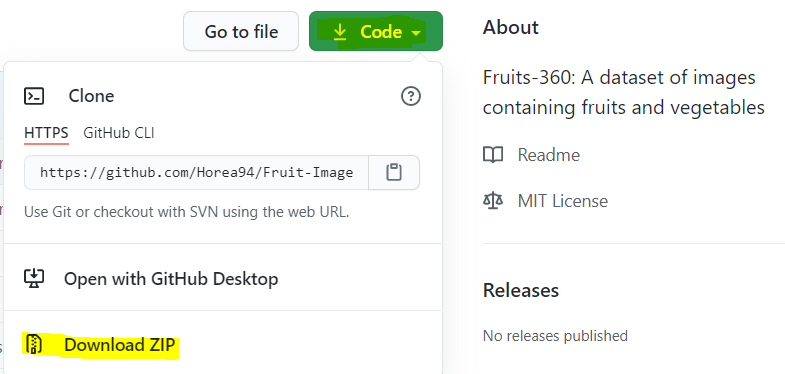

Копировать адрес ссылки на архив zip: https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip

(нажать правой кнопкой мыши на Download ZIP)

Параметр -O сохраняет файл в текущем каталоге.





In [ ]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip -O master.zip

In [35]:
!unzip master.zip

Archive:  master.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of master.zip or
        master.zip.zip, and cannot find master.zip.ZIP, period.


##Загружаем необходимые библиотеки и модули

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import Sequential
from google.colab import files
from PIL import Image

##Генерация датасетов
Generate a Dataset

####Обучающий и проверочный датасеты

In [37]:
image_size = (100, 100)
batch_size = 512

train_ds = image_dataset_from_directory(
    "Fruit-Images-Dataset-master/Training",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = image_dataset_from_directory(
    "Fruit-Images-Dataset-master/Training",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.
Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


In [38]:
# Посмотрим на названия классов
class_names = train_ds.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [39]:
# Посчитаем количество классов
len(class_names)

131

In [40]:
class_names[26]

'Cherry 1'

###Визуализация изображений

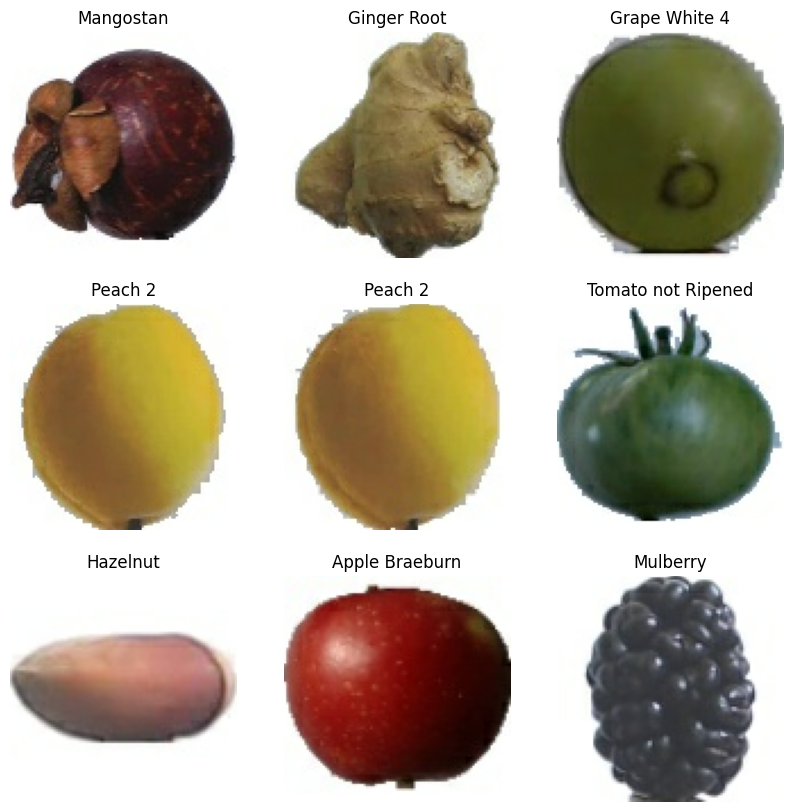

In [41]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

####Тестовый датасет

In [42]:
test_ds = image_dataset_from_directory(
    "Fruit-Images-Dataset-master/Test",
    image_size=image_size,
    batch_size=batch_size,
)

Found 22688 files belonging to 131 classes.


In [43]:
# Посмотрим на названия классов
test_ds.class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

##Настройка подачи набора данных для повышения производительности

API tf.data помогает создавать гибкие и эффективные конвейеры ввода (input pipelines).

Используем буферизованную предварительную выборку, чтобы получать данные с диска без блокировки ввода-вывода.

Подробнее о методе prefetch:
 https://www.tensorflow.org/guide/data_performance#prefetching

In [44]:
#train_ds = train_ds.prefetch(buffer_size = 32)
#val_ds = val_ds.prefetch(buffer_size = 32)
#test_ds = test_ds.prefetch(buffer_size = 32)

By using autotune, you allow TF to find the optimal buffer size:

.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

https://towardsdatascience.com/practical-coding-in-tensorflow-2-0-fafd2d3863f6

https://www.tensorflow.org/guide/data_performance#prefetching


In [45]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size = AUTOTUNE)

##Создаем модель


In [46]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding = 'same', activation='relu',
                 input_shape=(100, 100, 3)))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (5, 5), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой
model.add(Dense(131, activation='softmax')) # 131 classes

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)       

In [48]:
from tensorflow.keras import utils

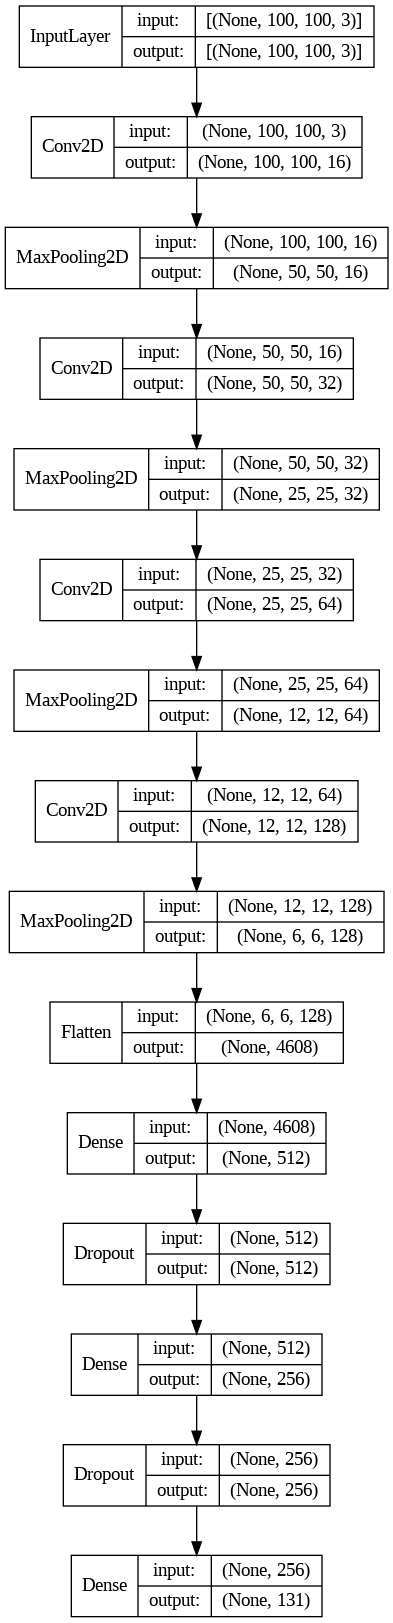

In [49]:
utils.plot_model(model, to_file='model_Fruit.png', show_shapes=True, show_layer_names=False)

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

##Обучаем модель

In [ ]:
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs=4,
                    verbose=2)

Epoch 1/4
106/106 - 23s - loss: 4.2685 - accuracy: 0.3870 - val_loss: 0.1854 - val_accuracy: 0.9470 - 23s/epoch - 218ms/step


####Визуализация обучения

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],
         label='Функция ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Функция ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция ошибки')
plt.legend()
plt.show()

##Оцениваем качество обучения модели - метод evaluate

Метод evaluate() возвращает значения функции потерь и метрики accuracy для обученной модели:

In [ ]:
scores = model.evaluate(test_ds, verbose=1)

In [ ]:
scores

In [ ]:
print(f'Доля верных ответов на тестовых данных = {round(scores[1]*100, 2)} %')

##Сохраняем обученную модель

In [ ]:
model.save('Fruit-CNN.h5')

In [ ]:
# загружаем на локальный диск
files.download('Fruit-CNN.h5')

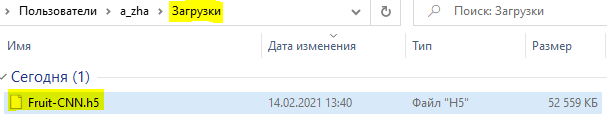

In [ ]:
# загружаем на Google диск - 'путь - откуда' 'путь - куда'
!cp '/content/Fruit-CNN.h5'

#Сохранение весов модели

In [ ]:
model.save_weights('my_model_weights.h5')

###Действия с сохраненной моделью

In [ ]:
# загрузим сохраненную модель
from keras.models import load_model
model_save = load_model("/content/drive/MyDrive")

In [ ]:
#посмотрим на архитектуру загруженной модели
model_save.summary()

#Применяем модель для распознавания изображений

In [ ]:
filename = '/content/Fruit-Images-Dataset-master/Test/Apple Red 1/321_100.jpg'
img = image.load_img(filename, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
#Преобразуем картинку в массив
x=image.img_to_array(img)

In [ ]:
x.shape

In [ ]:
# Меняем форму массива
x=x.reshape(1, 100, 100, 3)
# Инвертируем изображение
#x=255-x
# Нормализуем изображение
x/=255

In [ ]:
prediction = model.predict(x)
#print(prediction)
print('\033[91m', "Возможно, это", class_names[np.argmax(prediction)]) # ANSI escape code (color management), finding the maximum in the sequence 'prediction'